<a href="https://colab.research.google.com/github/HaPPyDutCHoGGG/Spectral-filtering/blob/main/spectralFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
import operator

In [ ]:
def RMSE(list1,list2):
  difference = [(np.abs(p-s))**2 for p,s in zip(points1,origin(t))]
  summ = sum(difference)
  return np.sqrt(summ/len(list1))

###Входные параметры

In [ ]:
filter_type = "butterworth"#"butterworth""cheby1""cheby2"
basis_type = "haar"#legendre,cos,haar
n = 256  # matrix dim = n x n
T = 5    # final time
E = np.eye(n) # dim(diag(1...1)) = n x n

harm1 = 200 # порядковый номер гармоники сигнала по i=0,1...
harm2 = n-2 # порядковый номер гармоники шума по i=0,1...

epsilon = 1
t = np.linspace(0,T,10000)                           # time
#origin = lambda t: np.cos(2*np.pi*t)               # signal

#freq1 = harm1 / (2*T)
freq1 = 2*np.pi#20*np.pi
deg = 5 # порядок фильтра/полинома
srez = 100#freq1*2*np.pi + 0.5
print(srez,freq1)
#48.842125090035836 48.836838573628214

#origin = lambda t: t + 1
#origin = lambda t:np.sqrt(2/T)*np.cos((freq1*np.pi*t)/T) # signal without noise np.sqrt(2/T) *
origin = lambda t: np.sin(freq1*t)

#freq1 = 10
noise = lambda t:0.2*np.cos((harm2*np.pi*t)/T) + 0.2*np.cos(((harm2-8)*np.pi*t)/T)
#noise = np.random.normal(0, 0.1, 1000)
#print(f'harm:{harm1} freq:{freq1}---{freq1*2*np.pi}')
print(f'Дипазон частот: {0}---{n / (2*T)} Gz или {0}---{np.pi * 2 * n / (2*T)} $s^-1$')

100 6.283185307179586
Дипазон частот: 0---25.6 Gz или 0---160.8495438637974 $s^-1$


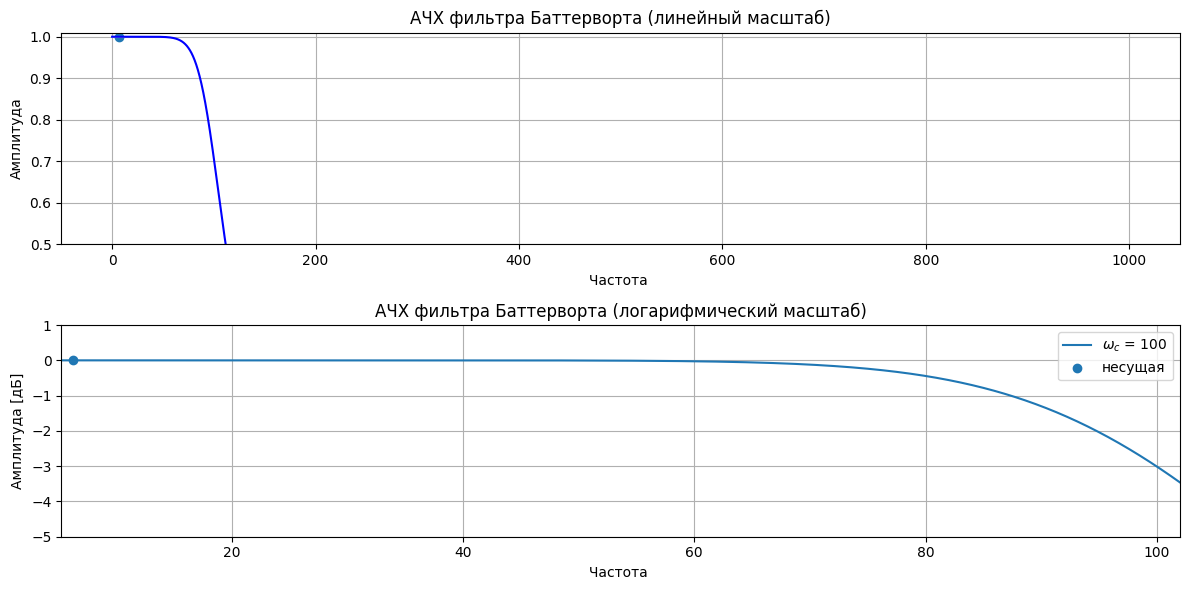

In [ ]:
# Параметры фильтра

 #500 * 2 * np.pi  # частота среза

# Вектор частот
omega = np.linspace(0,1000,10000)

# Вычисление АЧХ
if filter_type == "butterworth":
  H =lambda w,srez,deg: 1 / np.sqrt(1 + (w / srez)**(2 * deg))
  # Построение графиков АЧХ
  plt.figure(figsize=(12, 6))

  # Линейное отображение
  plt.subplot(2, 1, 1)
  plt.plot(omega, H(omega,srez,deg), 'b')
  plt.scatter(freq1,1,label="несущая")
  plt.title('АЧХ фильтра Баттерворта (линейный масштаб)')
  plt.xlabel('Частота ')
  plt.ylabel('Амплитуда')
  plt.ylim(0.5,1.01)
  plt.grid()

  # Логарифмическое отображение
  plt.subplot(2, 1, 2)
  plt.plot(omega, 20 * np.log10(H(omega,srez,deg)), label=f'$\omega_c$ = {srez}')
  plt.scatter(freq1,0,label="несущая")
  plt.title('АЧХ фильтра Баттерворта (логарифмический масштаб)')
  plt.xlabel('Частота ')
  plt.ylabel('Амплитуда [дБ]')
  plt.xlim(freq1-1,srez+2)
  plt.ylim(-5,1)
  plt.grid()
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
def poly_cheby1(deg,w,srez,filter_type):
  n = deg + 1
  w_mod = w
  if filter_type == "cheby1": w_mod = w/srez
  if filter_type == "cheby2": w_mod = np.array([srez/_w for _w in w])

  poly = np.zeros((n, len(w)))
  #print(poly.shape)
  poly[0] = [1 for i in range(len(w))]

  poly[1] = [item for item in w_mod]

  for i in range(1,n-1):
    poly[i+1] = ( 2*w_mod*poly[i] - poly[i-1] )

  return poly

omega = np.linspace(0,1000,100000)



if filter_type == "cheby1":
  ACHX_cheby1 = lambda w,eps,srez,n: 1 / np.sqrt(1 + (eps**2)*(poly_cheby1(deg,omega,srez,filter_type)[n])**2)
  for i in range(1,deg+1):
    mass = ACHX_cheby1(omega,epsilon,srez,i)

  plt.subplot(2, 1, 1)
  plt.plot(omega,mass)
  plt.scatter(freq1,1,label="несущая")
  plt.grid()
  plt.subplot(2, 1, 2)
  plt.plot(omega,20 * np.log10(mass), label=f"deg = {i}")

  plt.scatter(freq1,0,label="несущая")
  plt.grid()
  plt.title("Логарифмическая АЧХ")
  plt.ylim(-3,0.5)
  plt.xlim(0,srez)

  plt.legend([f"$\omega_c$ = {srez}"])




In [ ]:
if filter_type == "cheby2":
  ACHX_cheby2 = lambda w,eps,srez,n: 1 / np.sqrt(1 + 1/((eps**2)*(poly_cheby1(deg,omega,srez,filter_type)[n])**2))
  for i in range(2,deg+1):
    mass = ACHX_cheby2(omega,0.01,srez,i)

  plt.subplot(2, 1, 1)
  plt.plot(omega,mass)
  plt.scatter(freq1,1,label="несущая")
  plt.grid()
  plt.subplot(2, 1, 2)
  plt.plot(omega,20 * np.log10(mass), label=f"$\omega_c$ = {srez}")

  plt.scatter(freq1,0,label="несущая")
  plt.grid()
  plt.title("Логарифмическая АЧХ")
  plt.ylim(-50,10)
  plt.xlim(0,srez)
  plt.legend()

### Базисы


In [ ]:
# косинусоиды
qi = lambda t,i,T: np.sqrt(2/T) * np.cos((i*np.pi*t)/T) # basis functions
q0 = np.sqrt(1/T)

def Cbasis(t,n,T):

  basis = np.zeros((n, len(t)))
  basis[0] = q0
  for i in range(1,n):
    basis[i] = qi(t,i,T)

  return basis

# функции Хаара
def Hbasis(t,n,T):

  basis = np.zeros((n, len(t)))

  def veivlet(t):
    func = np.zeros(len(t))
    for i in range(len(t)):
      if (t[i] >= 0) and (t[i] < 1/2) :   func[i] = 1
      if (t[i] <  1) and (t[i] >= 1/2):   func[i] = -1
      if (t[i] >= 1) and (t[i] < 0)   :   func[i] = 0

    return func

  #print(t.shape,basis.shape)
  basis[0] = np.array([1/np.sqrt(T) for i in t])
  for m in range(n):
    k_last = (2**m) - 1
    #print(f"m = {m}, k_last = {k_last}")
    for k in range(k_last):

      i = (2**m) + k
      if i > n-1: break
      #print(f"-------{i}")
      arg = ((2**m)*t / T) - k
      basis[i] = np.sqrt((2**m)/T) * veivlet(arg)

  return basis

# многочлены Лежандра
def Lbasis(t,n,T):

  basis = np.zeros((n, len(t)))
  t_mod = (2*t/T) - 1


  basis[0] = [1 for i in range(len(t))]
  basis[1] = [item for item in t_mod]

  for i in range(1,n-1):
    basis[i+1] = ( (2*i+1)*t_mod*basis[i] - i*basis[i-1] ) / ( i+1 )
  for i in range(0,n):
    basis[i] = np.sqrt((2*i+1)/T) * basis[i]
  #print(basis.shape)
  return basis

if basis_type == "legendre": _Lbasis = Lbasis(t,n,T)
if basis_type == "haar": _Hbasis = Hbasis(t,n,T)

Случайный Гауссовский шум и его спектральная характеристика


<class 'numpy.ndarray'>


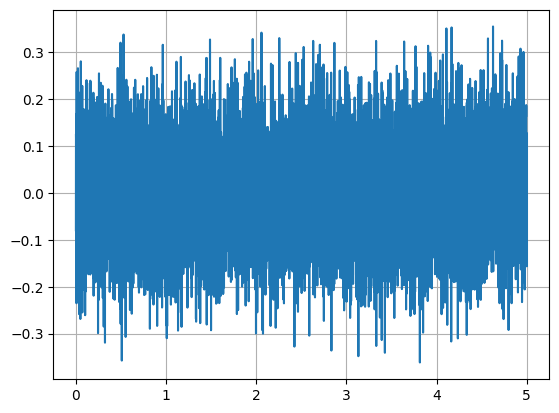

In [ ]:
mathExp = 0
Deviation = 0.1
white_noise = np.random.normal(mathExp, Deviation, len(t))

plt.plot(t, white_noise)
plt.grid()
signal = origin(t) + white_noise#white_noise
print(type(t))

сделали с белым шумом все то же самое что и ниже (обратное спектральное) \\
оформить в функцию

###Вычисление ДНПФ дифференцирующего звена $P \in R^{n \times n}$ в базисе косинусоид

In [ ]:
def get_P_DNPF(n,basis_name):
  Pt = np.zeros((n, n))

  if (basis_name=="cos"):
    Pt[:,0] = [np.sqrt(2) for i in range(n)]
    Pt[0]   = [np.sqrt(2)*(-1)**i for i in range(n)]
    Pt[0][0] = 1

    for i in range(1,n):
      for j in range(1,n):
        if i==j:  Pt[i][j] = 2
        else   :  Pt[i][j] = 2*(i**2 - ((-1)**(i+j) * j**2)) / (i**2 - j**2)


  if (basis_name=="legendre"):
    for i in range(0,n):
      for j in range(0,n):
        if (i>j): Pt[i][j] = (-1)**(np.abs(j-i))*np.sqrt((2*j+1)*(2*i+1))
        else:     Pt[i][j] = np.sqrt((2*j+1)*(2*i+1))


  if (basis_name=="haar"):

      L = n
      if (n%2 != 0):
        print("err: dimension of matrix is not 2^n")
      else:
        Pt[0][0] = 1
        l = int(np.log2(L))
        #print(f"{l}")
        for s in range(0, l):
          A = np.sqrt(2**s)
          Pt[0][(2**(s+1)) - 1] = -A
          Pt[2**s][0] = A
          for k in range(0, (2**s)):
            Pt[(2**s) + k][(2**s) + k] = 3 * (2**s)

        for s in range(0, l-1):
          for m in range(1, l-s):
            A = np.sqrt(2**(2*s + m))
            for k in range(0, (2**s)):
              Pt[(2**s)+k][(2**m)*((2**s)+k+1) - 1] = A
              Pt[(2**m)*((2**s)+k)][(2**s)+k] = A
              Pt[(2**s)+k][(2**m)*((2**s)+k) + (2**(m-1)) - 1] = -2*A
              Pt[(2**m)*((2**s)+k) + (2**(m-1))][(2**s)+k] = -2*A

        for s in range(1, l):
          for m in range(0, l-s):
            A = np.sqrt(2**(2*s + m))
            for k in range(0, (2**s)-1):
              Pt[(2**s)+k+1][(2**m)*((2**s)+k+1) - 1] = A
              Pt[(2**m)*((2**s)+k+1)][(2**s)+k] = A

  return np.dot((1/T), Pt)
P = get_P_DNPF(n,basis_type)
#print(P)

Спектральное разложение шума

###Спектральные характеристики: Полезный сигнал $Z$, Шум $N$, Смесь $G$

In [ ]:
#nZ = np.zeros(n); nZ[100]=1
#nN = np.zeros(n); nN[harm2] = 0.2; nN[harm2-8] = 0.2
#Z= nZ.reshape(-1, 1)
#N= nN.reshape(-1, 1)

c = np.zeros(n)

# Вычисляем коэффициенты
# косинусоиды
if basis_type == "cos":
  c[0] = np.trapz((signal) * q0, t)
  for i in range(1, n):
    c[i] = np.trapz((signal) * qi(t, i, T), t)
# многочлены Лежандра
if basis_type == "legendre":
  for i in range(0,n):
    c[i] = np.trapz((signal) * _Lbasis[i], t)
# функции Хаара
if (basis_type=="haar"):
  for i in range(0,n):
    c[i] = np.trapz((signal) * _Hbasis[i], t)

_c= c.reshape(-1, 1) # спектральная характеристика БШ

G = _c #+N

<ipython-input-18-e19f1a038576>:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c[i] = np.trapz((signal) * _Hbasis[i], t)


Text(0, 0.5, '$G_i$')

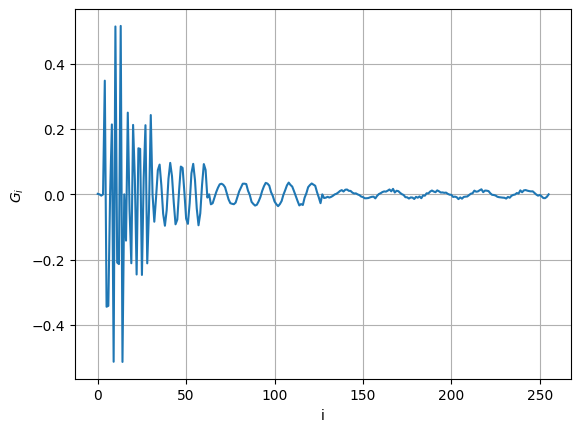

In [ ]:
plt.plot([i for i  in range(n)],G)
plt.grid()
plt.xlabel('i')
plt.ylabel('$G_i$')
#plt.xlim(99,101)

###ДНПФ аппериодическог звена 1ого порядка
### Спектральная характеристика выхода фильтра


[(-0.3090169943749474+0.9510565162951535j), (-0.8090169943749475+0.5877852522924731j), (-1+6.123233995736766e-17j), (-0.8090169943749475-0.587785252292473j), (-0.3090169943749475-0.9510565162951535j)]


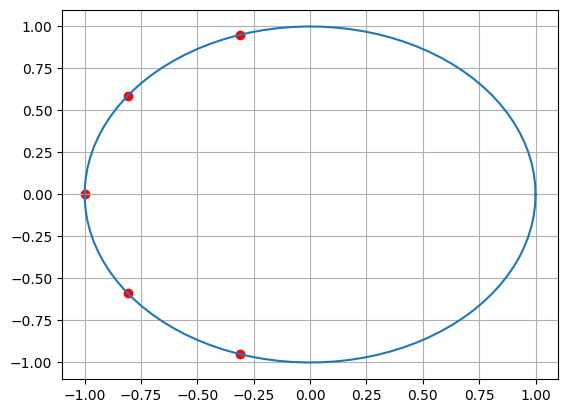

In [ ]:
# корни полинома (нормированного)
def get_poly_roots(deg, poly_type, eps=1):
  roots = []
  n = deg
  if poly_type == "butterworth":
    for k in range(1,n+1):
      s_k = (1j*np.cos((2*k-1)*np.pi/(2*n)) - np.sin((2*k-1)*np.pi/(2*n)))
      roots.append(s_k)
  if poly_type == "cheby1":
    for m in range(1,n+1):
      theta_m = (np.pi*(2*m - 1))/(2*n)
      s_m = -np.sinh((1/n)*np.arcsinh(1/eps))*np.sin(theta_m) +
              1j*np.cosh((1/n)*np.arcsinh(1/eps))*np.cos(theta_m)
      roots.append(s_m)
  if poly_type == "cheby2":
      for m in range(1,n+1):
        theta_m = (np.pi*(2*m - 1))/(2*n)
        s_m = (-np.sinh((1/n)*np.arcsinh(1/eps))*np.sin(theta_m) +
               1j*np.cosh((1/n)*np.arcsinh(1/eps))*np.cos(theta_m)) ** (-1)
        roots.append(s_m)

  return roots


theta = np.linspace(0, 2 * np.pi, 100)
r = 1
x = r * np.cos(theta)
y = r * np.sin(theta)

roots = get_poly_roots(5, filter_type, epsilon)
print(roots)
plt.plot(x, y)
plt.scatter([item.real for item in roots],[item.imag for item in roots],color="red")
#plt.scatter([-item.real for item in roots],[item.imag for item in roots],color="red")
plt.ylim()
plt.grid()
plt.show() # для запуска в другой IDE

In [ ]:
W1 = np.linalg.inv((1/srez)*P + E)
W2 = np.linalg.inv((1/(srez**2))*np.dot(P,P) + np.sqrt(2)/srez * P + E)
W3 = np.linalg.inv((1/(srez**3))*np.dot(np.dot(P,P),P) + (2/(srez**2))*np.dot(P,P) + (2/srez)*P + E)

# Вычисления ДНПФ для фильтра порядка n
def get_filter_DNPF(roots, P, srez,filter_type=None, eps=1):
  # roots -- полюса передаточной функции
  # P -- ДНПФ дифф звена
  # sres -- частота среза
  n = P.shape[0]
  E = np.eye(n)



  buf = 1/srez*P - roots[0]*E
  for i in range(1,len(roots)):
    bufi = ((1/srez)*P - roots[i]*E)
    buf = np.dot(buf,bufi)

  if (filter_type=="cheby1") or (filter_type=="cheby2"):
    A = (2**(len(roots)-1)) * eps
    print(A,len(roots),deg)
    return np.linalg.inv(buf) / A
  else: return np.linalg.inv(buf)


W = get_filter_DNPF(roots, P, srez,filter_type,epsilon)

#print(W3)
print("-------------------")
print(W)

-------------------
[[ 9.93527864e-01+2.04727631e-16j  6.47213595e-03+1.50557254e-18j
  -6.73268870e-20-3.58657232e-21j ...  9.50093718e-04+1.64978783e-18j
   6.59851192e-03+3.24567620e-18j  1.34470780e-02-1.67488477e-18j]
 [-6.47213595e-03-2.02085183e-18j  9.80583592e-01+3.09057285e-16j
   1.83059649e-02+4.61505602e-18j ... -9.50093718e-04-2.00931685e-18j
  -6.59851192e-03-3.93351367e-18j -1.34470780e-02+2.73093565e-19j]
 [-9.15298245e-03-2.94319532e-18j -9.15298245e-03-3.51611875e-18j
   9.61167184e-01+1.58598395e-16j ...  5.34868921e-21+3.61224691e-21j
  -1.47866144e-20+5.16805819e-21j -1.64480349e-20+8.08623072e-21j]
 ...
 [ 3.00353042e-34-1.36467905e-34j -2.15722449e-27+1.49770150e-26j
   1.52641146e-27-1.05903277e-26j ...  4.82721504e-02+3.48874849e-18j
  -1.08104090e-18-6.79595248e-19j -3.24312269e-18+1.45867481e-18j]
 [-6.31919946e-35+2.87165232e-35j -8.39125597e-30+5.56303523e-29j
   5.71788636e-30-3.93410539e-29j ...  2.76485493e-02+1.36164273e-17j
   4.82721504e-02+4.8609195

In [ ]:
X1 = np.dot(W1,G)
X2 = np.dot(W2,G)
X3 = np.dot(W3,G)
X = np.dot(W,G)
#print(X[:,0][0])

###Аналитический расчет задержки линейной системы

$$\tau_{гр}(\omega)=-\frac{\partial \phi(\omega)}{\partial \omega}$$
$$\tau_{ф}(\omega)=-\frac{\phi(\omega)}{\omega}$$

Фильтр Баттерворта 1 порядка представляет собой апериодическое звено 1 порядка с передаточной функцией $$H(s)=\frac{K}{Ts+1}$$ где $K=1$ коэфициент усиления, $T=\frac{1}{\omega_{среза}}$ \\
$$\tau_{гр} = \frac{T}{1+T^2\omega^2}$$
$$\tau_{ф} = \frac{\arctan{T\omega}}{\omega}$$



<ipython-input-44-8b887e3ed088>:5: RuntimeWarning: invalid value encountered in scalar divide
  phase_delay_1 = lambda w: np.arctan(Tt*w)/w


freq:6;  time_delay:0.009960676824071726
freq:6;  phase_delay:0.009986871610744932


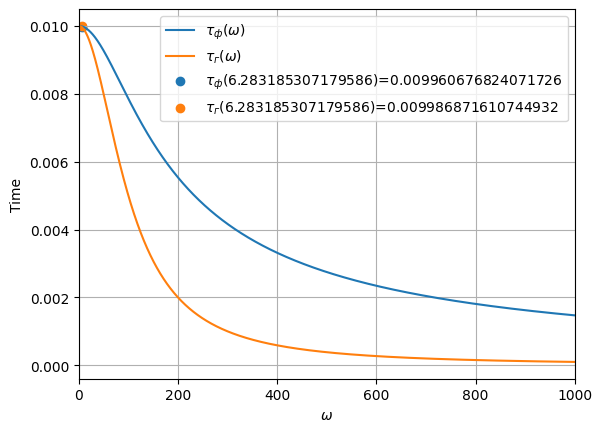

In [ ]:
#задержка фильтра 1ого порядка
#задержка от частоты
Tt = 1/srez
group_delay_1 = lambda w: Tt/(1+(Tt*w)**2)
phase_delay_1 = lambda w: np.arctan(Tt*w)/w

w = np.linspace(0,1000,100000)
GD = [group_delay_1(_w) for _w in w]
PD = [phase_delay_1(_w) for _w in w]

tau1_g = group_delay_1(freq1)
tau1_p = phase_delay_1(freq1)

#print(zd)
print(f"freq:{round(freq1)};  time_delay:{tau1_g}")
print(f"freq:{round(freq1)};  phase_delay:{tau1_p}")

plt.plot(w,PD, label="$τ_{ф}(\omega)$")
plt.plot(w,GD, label="$τ_{г}(\omega)$")
plt.xlabel("$\omega$")
plt.ylabel("Time")
plt.scatter([freq1],[tau1_g],label=f"$τ_ф({freq1})$={tau1_g}")
plt.scatter([freq1],[tau1_p],label=f"$τ_г({freq1})$={tau1_p}")
plt.grid()
plt.xlim(0,1000) # масштаб по частоте
plt.legend()
plt.show()

Фильтр Баттерворта 2 порядка представляет собой колебательное звено  с передаточной функцией $$H(s)=\frac{K}{T^2s^2+2\xi Ts+1},\xi \in(-1;1)$$ где $K=1$ коэфициент усиления, $T=\frac{1}{\omega_{среза}},\xi=\frac{\sqrt{2}}{2}$  \\
$$\tau_{гр} = \frac{2\xi T(T^2\omega^2 + 1)}{(T^2\omega^2-1)^2 \cdot (1+(\frac{2\xi T \omega}{1-T^2\omega^2})^2)}$$
$$\tau_{ф} = \frac{\arctan(\frac{2\xi T \omega}{1-T^2\omega^2})}{\omega}$$


<ipython-input-45-18e354169f81>:9: RuntimeWarning: invalid value encountered in scalar divide
  phase_delay_2 = lambda w: np.arctan(phi_arg(w)) / w


freq:6;  time_delay:0.014197745259014394
freq:6;  phase_delay:0.014160701722016628


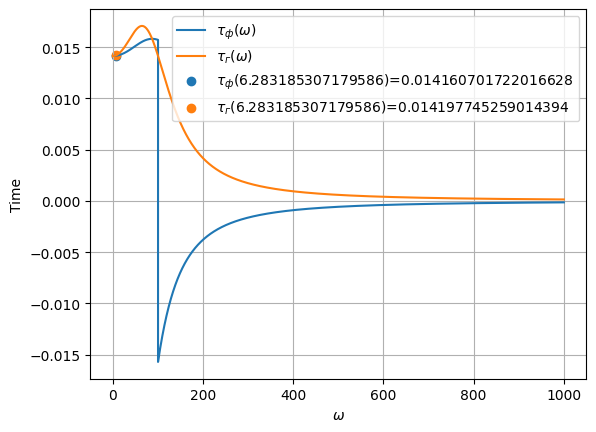

In [ ]:
#задержка фильтра 2ого порядка
#задержка от частоты

Tt = 1/srez
xie = np.sqrt(2)/2
phi_arg = lambda w: (2*xie*Tt*w) / (1 - (Tt*w)**2)

group_delay_2 = lambda w: (2*xie*Tt*((w*Tt)**2 + 1)) / ((1 + (phi_arg(w))**2) * ((w*Tt)**2 - 1)**2)
phase_delay_2 = lambda w: np.arctan(phi_arg(w)) / w
#def phase_delay_2(w):
#  if (w<=(srez)): return -np.arctan(phi_arg(w))
#  else: return (-np.pi - np.arctan(phi_arg(w)))

w = np.linspace(0,1000,100000)
GD = [group_delay_2(_w) for _w in w]
PD = [phase_delay_2(_w) for _w in w]

tau2_g = group_delay_2(freq1)
tau2_p = phase_delay_2(freq1)

print(f"freq:{round(freq1)};  time_delay:{group_delay_2(freq1)}")
print(f"freq:{round(freq1)};  phase_delay:{phase_delay_2(freq1)}")

plt.plot(w,PD, label="$τ_{ф}(\omega)$")
plt.plot(w,GD, label="$τ_{г}(\omega)$")
plt.scatter([freq1],[tau2_p], label=f"$τ_ф({freq1})$={tau2_p}")
plt.scatter([freq1],[tau2_g], label=f"$τ_г({freq1})$={tau2_g}")
plt.xlabel("$\omega$")
plt.ylabel("Time")
plt.grid()
plt.legend()
plt.show()

Фильтр Баттерворта 3 порядка с передаточной функцией
$$H(s)=\frac{K}{(Ts+1)(T^2s^2+Ts+1)}$$
где $K=1$ коэфициент усиления, $T=\frac{1}{\omega_{среза}}$  \\
$$\tau_{гр} = \frac{2\xi T(T^2\omega^2 + 1)}{(T^2\omega^2-1)^2 \cdot (1+(\frac{2\xi T \omega}{1-T^2\omega^2})^2)}$$
$$\tau_{ф} = \frac{\arctan(\frac{2\xi T \omega}{1-T^2\omega^2})}{\omega}$$


<ipython-input-46-5008adb5c8e0>:8: RuntimeWarning: invalid value encountered in scalar divide
  phase_delay_3 = lambda w: -np.arctan(phi_arg(w)) / w


freq:6;  time_delay:2.0039788893669326
freq:6;  phase_delay:0.020013221638284534


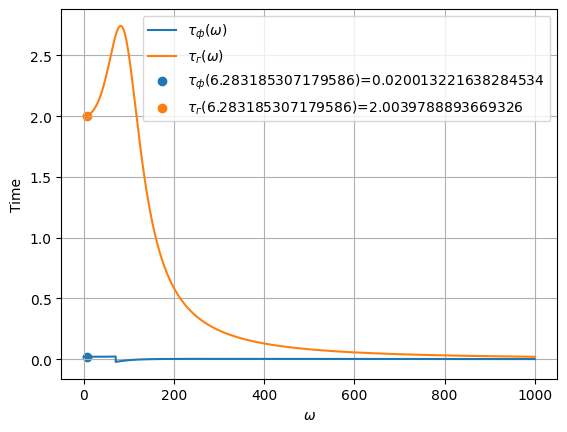

In [ ]:
#задержка фильтра 3ого порядка
#задержка от частоты

Tt = 1/srez
phi_arg = lambda w: ((w*Tt)**3 - 2*w*Tt) / (1 - 2*(w*Tt)**2)

group_delay_3 = lambda w: (2*(w*Tt)**4 + (w*Tt)**2 + 2) / ((1 + (phi_arg(w))**2) * (2*(w*Tt)**2 - 1)**2)
phase_delay_3 = lambda w: -np.arctan(phi_arg(w)) / w

w = np.linspace(0,1000,100000)
GD = [group_delay_3(_w) for _w in w]
PD = [phase_delay_3(_w) for _w in w]

tau3_g = group_delay_3(freq1)
tau3_p = phase_delay_3(freq1)

print(f"freq:{round(freq1)};  time_delay:{tau3_g}")
print(f"freq:{round(freq1)};  phase_delay:{tau3_p}")

plt.plot(w,PD, label="$τ_{ф}(\omega)$")
plt.plot(w,GD, label="$τ_{г}(\omega)$")
plt.scatter([freq1],[tau3_p], label=f"$τ_ф({freq1})$={tau3_p}")
plt.scatter([freq1],[tau3_g], label=f"$τ_г({freq1})$={tau3_g}")
plt.xlabel("$\omega$")
plt.ylabel("Time")
plt.grid()
plt.legend()
plt.show()

group delay:0.9602985466935292 at 6.280062800628007
phase delay:0.03237696083261856 at 6.280062800628007


<ipython-input-47-3c92742615e3>:32: RuntimeWarning: divide by zero encountered in scalar divide
  return np.array([-cm.phase(phie)/w for phie,w in zip(c_args,omega)])


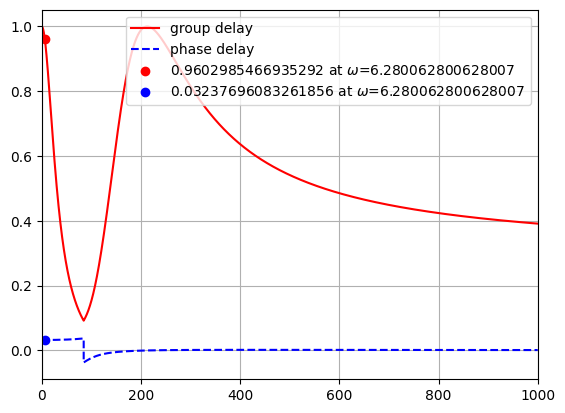

In [ ]:
omega = np.linspace(0,1000,100000)


def freq_charact(omega, poles, srez):
  c_omega = np.array([1j*w for w in omega])
  values = (c_omega/srez) - poles[0]
  for k in range(1,len(poles)):
    values *= (c_omega/srez) - poles[k]
  return values**(-1)#[1/arg for arg in values]

argW = freq_charact(omega, roots, srez)

def group_delay(c_args,omega=None):
  delay_per_freq = np.zeros(len(c_args))
  for i in range(len(c_args)):
    delay_per_freq[i] = 1 / ( 1 + (cm.phase(c_args[i]))**2 )
  return delay_per_freq

'''def group_delay(c_args,omega):
  delay_per_freq = np.zeros(len(c_args))
  h = omega[-1]/len(omega)
  for i in range(1,len(c_args)):
    delay_per_freq[i] = (c_args[i]-c_args[i-1])/h
  return delay_per_freq'''

def phase_delay(c_args,omega):
  '''  a = 0
  for item in c_args:
    if (item.imag/item.real)>=(np.pi/2): a+=1
  print(a)
  '''
  return np.array([-cm.phase(phie)/w for phie,w in zip(c_args,omega)])



tau_gr = group_delay(argW,omega)
tau_ph = phase_delay(argW,omega)

'''def get_delay_atfreq(delay, omega, freq):
  for i in range(len(omega)):
    if np.abs(freq-omega[i]) < 0.05:
      return delay[i]'''

def get_delay_atfreq(delay, omega, freq):
  for i in range(2,len(omega)):
    if (freq>omega[i-2]) and (freq<omega[i]):
      return omega[i-1], delay[i-1].real

fg,tau_g = get_delay_atfreq(tau_gr, omega, freq1)
fp,tau_p = get_delay_atfreq(tau_ph, omega, freq1)
print(f"group delay:{tau_g} at {fg}")
print(f"phase delay:{tau_p} at {fp}")

plt.plot(omega, tau_gr, "r", label="group delay")
plt.plot(omega, tau_ph, "b--", label="phase delay")
plt.scatter(fg,tau_g,color="red",label=f"{tau_g} at $\omega$={fg}")
plt.scatter(fp,tau_p,color="blue",label=f"{tau_p} at $\omega$={fp}")
plt.xlim(0,1000)
#plt.ylim(0,0.01)
plt.grid()
plt.legend()

###Поиск оригинала выхода фильтра

In [ ]:
'''points1 = []
for i in range(len(t)):
  point = 0
  for j in range(len(X1)):
    if j==0: point += q0*X1[:,0][0]
    else   : point += qi(t[i]+0, j, T)*X1[:,0][j]
  points1.append(point)'''

'points1 = []\nfor i in range(len(t)):\n  point = 0\n  for j in range(len(X1)):\n    if j==0: point += q0*X1[:,0][0]\n    else   : point += qi(t[i]+0, j, T)*X1[:,0][j]\n  points1.append(point)'

In [ ]:
'''points2 = []
for i in range(len(t)):
  point = 0
  for j in range(len(X2)):
    if j==0: point += q0*X2[:,0][0]
    else   : point += qi(t[i]+0, j, T)*X2[:,0][j]
  points2.append(point)'''

'points2 = []\nfor i in range(len(t)):\n  point = 0\n  for j in range(len(X2)):\n    if j==0: point += q0*X2[:,0][0]\n    else   : point += qi(t[i]+0, j, T)*X2[:,0][j]\n  points2.append(point)'

In [ ]:
'''points3 = []
for i in range(len(t)):
  point = 0
  for j in range(len(X3)):
    if j==0: point += q0*X3[:,0][0]
    else   : point += qi(t[i]+tau3_p, j, T)*X3[:,0][j]
  points3.append(point)'''

'points3 = []\nfor i in range(len(t)):\n  point = 0\n  for j in range(len(X3)):\n    if j==0: point += q0*X3[:,0][0]\n    else   : point += qi(t[i]+tau3_p, j, T)*X3[:,0][j]\n  points3.append(point)'

In [ ]:
# косинусоиды
if basis_type == "cos":
  points = []
  for i in range(len(t)):
    point = 0
    for j in range(len(X)):
      if j==0: point += q0*X[:,0][0]
      else   : point += qi(t[i]+tau_p, j, T)*X[:,0][j]
    points.append(point)

# полиномы Лежандра
if basis_type == "legendre":
  _Lbasis_mod = Lbasis(t+tau_p,n,T)
  points = np.zeros(len(t))
  for i in range(n):
    #points += _Lbasis[i]*X[:,0][i].real
    point = np.array([X[:,0][i].real*item for item in _Lbasis_mod[i]])
    #points = list(map(operator.add, points, point))
    points += point

# функции Хаара
if basis_type == "haar":
  _Hbasis_mod = Hbasis(t+tau_p,n,T)
  points = np.zeros(len(t))
  for i in range(n):
    #points += _Lbasis[i]*X[:,0][i].real
    point = np.array([X[:,0][i].real*item for item in _Hbasis_mod[i]])
    #points = list(map(operator.add, points, point))
    points += point
points = np.array(points)

NameError: name 'basis_type' is not defined

###Графики

In [ ]:
#plt.plot(t,[origin(a)+noise(a) for a in t],label="signal+noise", color = "orange")
plt.plot(t, signal ,label="signal+noise", color = "orange")
plt.plot(t, origin(t),"r",label="signal")

#plt.plot(t,points1,label="filter order=1")
#plt.plot(t,points2,label="filter order=2")
#plt.plot(t,points3,label="filter order=3")
#plt.plot(t,[i/3.6 for i in points],"g", label=f"filter {deg}rd order")

plt.plot(t,points,"g", label=f"filter {deg}rd order")

plt.xlim(0 , T)   # интервал по x на графике
#plt.ylim(-1.05,-0.95)  # интервал по y на графике
plt.title("without delay")
plt.grid()
plt.legend()
plt.show()

In [ ]:
'''err1 = [np.abs(p-s) for p,s in zip(points1,origin(t))]
err2 = [np.abs(p-s) for p,s in zip(points2,origin(t))]
err3 = [np.abs(p-s) for p,s in zip(points3,origin(t))]

plt.plot(t, err1, label=f'filter order 1, MRSE:{RMSE(points1,origin(t))}')
plt.plot(t, err2, label=f'filter order 2, MRSE:{RMSE(points2,origin(t))}')
plt.plot(t, err3, label=f'filter order 3, MRSE:{RMSE(points3,origin(t))}')
plt.legend()
plt.grid()'''

"err1 = [np.abs(p-s) for p,s in zip(points1,origin(t))]\nerr2 = [np.abs(p-s) for p,s in zip(points2,origin(t))]\nerr3 = [np.abs(p-s) for p,s in zip(points3,origin(t))]\n\nplt.plot(t, err1, label=f'filter order 1, MRSE:{RMSE(points1,origin(t))}')\nplt.plot(t, err2, label=f'filter order 2, MRSE:{RMSE(points2,origin(t))}')\nplt.plot(t, err3, label=f'filter order 3, MRSE:{RMSE(points3,origin(t))}')\nplt.legend()\nplt.grid()"

###Вывод
Нужно пересчитать

In [ ]:
'''achx_4 = ACHX_cheby1(omega,eps,srez,deg)
for i in range(len(achx_4)):
  if achx_4[i]>=0.999999: print(f"$\omega$={omega[i]}----achx_4={achx_4[i]}----deg {deg}----{i}")'''

'achx_4 = ACHX_cheby1(omega,eps,srez,deg)\nfor i in range(len(achx_4)):\n  if achx_4[i]>=0.999999: print(f"$\\omega$={omega[i]}----achx_4={achx_4[i]}----deg {deg}----{i}")'